In [12]:
import os
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
Updating files:  31% (45/142)
Updating files:  32% (46/142)
Updating files:  33% (47/142)
Updating files:  34% (49/142)
Updating files:  35% (50/142)
Updating files:  36% (52/142)
Updating files:  37% (53/142)
Updating files:  38% (54/142)
Updating files:  39% (56/142)
Updating files:  40% (57/142)
Updating files:  41% (59/142)
Updating files:  42% (60/142)
Updating files:  43% (62/142)
Updating files:  44% (63/142)
Updating files:  45% (64/142)
Updating files:  46% (66/142)
Updating files:  47% (67/142)
Updating files:  48% (69/142)
Updating files:  49% (70/142)
Updating files:  50% (71/142)
Updating files:  51% (73/142)
Updating files:  52% (74/142)
Updating files:  53% (76/142)
Updating files:  54% (77/142)
Updating files:  55% (79/142)
Updating files:  56% (80/142)
Updating files:  57% (81/142)
Updating files:  58% (83/142)
Updating files:  59% (84/142)
Updating files:  60% (86/142)
Updating files:  61% (87/142)
Updating files:  62% (89/142)
Updating files:

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5n', pretrained=True)

Using cache found in C:\Users\SHOCKER/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-6-30 Python-3.9.0 torch-2.0.1+cpu CPU

100%|██████████████████████████████████████████████████████████████████████████████| 3.87M/3.87M [00:04<00:00, 933kB/s]

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 


In [8]:
img = 'augmented/images/maksssksksss100_0.jpg'

results = model(img)
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 400x400 4 persons
Speed: 88.4ms pre-process, 463.5ms inference, 5.7ms NMS per image at shape (1, 3, 640, 640)

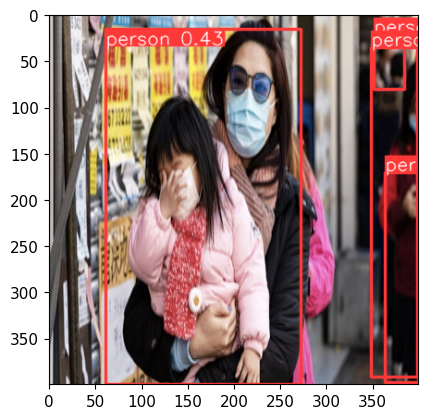

In [9]:
%matplotlib inline
plt.imshow((results.render()[0]))
plt.show()

In [41]:
# written to convert the already made json format to the yolo format
'''labels_path = 'augmented/annotations'
new_labels_path = 'augmented/labels'
class_map = {'with_mask':0, 'without_mask':1, 'mask_weared_incorrect':2}

for files in os.listdir(labels_path):
    img = cv2.imread(f'augmented/images/{files.split(".")[0]}.jpg')
    width, height, channel = np.shape(img)
    with open(f'{labels_path}/{files}', 'r') as f:
        file = json.load(f)
    bboxes = file['bboxes']
    
    for i in range(len(bboxes)):
        class_lab = class_map[file['class'][i]]
        x_center_norm = (((bboxes[i][0] + bboxes[i][2]) / 2) / width)
        y_center_norm = (((bboxes[i][1] + bboxes[i][3]) / 2) / height)
        width_norm = ((bboxes[i][2] - bboxes[i][0]) / width)
        height_norm = ((bboxes[i][3] - bboxes[i][1]) / height)
        with open(f'{new_labels_path}/{files.split(".")[0]}.txt', 'a') as c:
            c.write(f'{class_lab} {x_center_norm} {y_center_norm} {width_norm} {height_norm}\n')'''

In [42]:
from ultralytics import YOLO

In [52]:
model = YOLO('yolov5nu.pt')

In [62]:
model.train(data='dataset.yaml', epochs=100, imgsz=350)

New https://pypi.org/project/ultralytics/8.0.182 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.124  Python-3.9.0 torch-2.0.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov5nu.pt, data=dataset.yaml, epochs=100, patience=50, batch=16, imgsz=350, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=t

KeyboardInterrupt: 

In [111]:
img = 'augmented/val/images/maksssksksss701_0.jpg'

results = model(img)


image 1/1 C:\Users\SHOCKER\torch_projects\computer_vision\face_mask_detection\augmented\val\images\maksssksksss701_0.jpg: 640x640 1 without_mask, 529.6ms
Speed: 0.0ms preprocess, 529.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


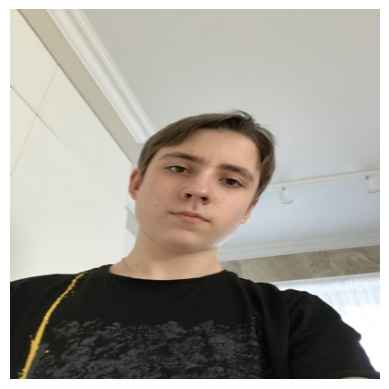

In [112]:
%matplotlib inline
plt.imshow(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

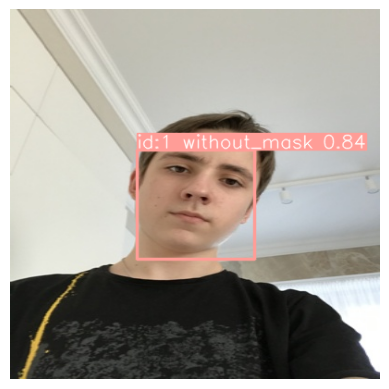

In [113]:
plt.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [114]:
images = [results[0].orig_img, results[0].plot()]
labels = ['Orig_img', 'Predicted']

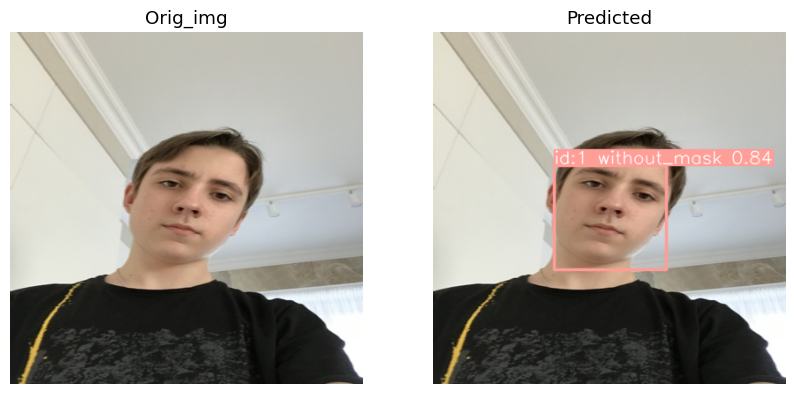

In [115]:
plt.figure(figsize=(10, 10))
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(labels[i])

## Real time predictions

In [116]:
cap  = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    cv2.imshow('frame', results[0].plot())
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 2878.0ms
Speed: 8.0ms preprocess, 2878.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 523.3ms
Speed: 45.0ms preprocess, 523.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 384.1ms
Speed: 6.0ms preprocess, 384.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 with_mask, 507.4ms
Speed: 7.0ms preprocess, 507.4ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 417.5ms
Speed: 12.0ms preprocess, 417.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 400.7ms
Speed: 7.0ms preprocess, 400.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 428.9ms
Speed: 8.0ms preprocess, 428.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 552.3ms
Speed: 7.0ms prepr


0: 480x640 (no detections), 347.6ms
Speed: 8.0ms preprocess, 347.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 359.9ms
Speed: 4.0ms preprocess, 359.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 351.5ms
Speed: 6.2ms preprocess, 351.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 331.8ms
Speed: 5.0ms preprocess, 331.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 339.0ms
Speed: 5.3ms preprocess, 339.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 380.4ms
Speed: 7.0ms preprocess, 380.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 408.0ms
Speed: 5.0ms preprocess, 408.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 362.0ms
Speed: 5.0ms prepr


0: 480x640 (no detections), 332.6ms
Speed: 8.0ms preprocess, 332.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 332.7ms
Speed: 7.0ms preprocess, 332.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 321.8ms
Speed: 6.0ms preprocess, 321.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 323.7ms
Speed: 7.0ms preprocess, 323.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 344.9ms
Speed: 5.0ms preprocess, 344.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 355.5ms
Speed: 7.0ms preprocess, 355.5ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 324.8ms
Speed: 6.0ms preprocess, 324.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 333.2ms
Speed: 8.0ms prepr

Speed: 6.0ms preprocess, 332.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 with_mask, 1 without_mask, 335.2ms
Speed: 6.0ms preprocess, 335.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 without_mask, 332.5ms
Speed: 7.0ms preprocess, 332.5ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 with_mask, 1 without_mask, 338.8ms
Speed: 4.0ms preprocess, 338.8ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 with_masks, 1 without_mask, 321.4ms
Speed: 7.0ms preprocess, 321.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 with_mask, 1 without_mask, 339.7ms
Speed: 41.9ms preprocess, 339.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 without_mask, 331.6ms
Speed: 4.0ms preprocess, 331.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 without_mask, 343.2ms
Speed: 6


0: 480x640 (no detections), 340.0ms
Speed: 6.0ms preprocess, 340.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 314.0ms
Speed: 5.0ms preprocess, 314.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 318.0ms
Speed: 5.0ms preprocess, 318.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 344.5ms
Speed: 7.0ms preprocess, 344.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 332.6ms
Speed: 4.0ms preprocess, 332.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 346.9ms
Speed: 5.0ms preprocess, 346.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 with_mask, 322.3ms
Speed: 7.0ms preprocess, 322.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 347.5ms
Speed: 8.0ms preproces


0: 480x640 1 without_mask, 361.4ms
Speed: 6.0ms preprocess, 361.4ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 without_mask, 330.2ms
Speed: 4.0ms preprocess, 330.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 without_mask, 320.0ms
Speed: 10.0ms preprocess, 320.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 with_mask, 1 without_mask, 329.0ms
Speed: 5.0ms preprocess, 329.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 without_mask, 332.0ms
Speed: 3.0ms preprocess, 332.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 without_mask, 326.4ms
Speed: 6.0ms preprocess, 326.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 without_mask, 343.3ms
Speed: 6.0ms preprocess, 343.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 without_mask, 336.0ms
Speed: 4.0ms


0: 480x640 3 with_masks, 336.7ms
Speed: 6.0ms preprocess, 336.7ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 with_mask, 1 mask_weared_incorrect, 302.8ms
Speed: 4.0ms preprocess, 302.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 353.1ms
Speed: 6.0ms preprocess, 353.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 with_masks, 1 mask_weared_incorrect, 335.5ms
Speed: 9.0ms preprocess, 335.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 with_mask, 1 mask_weared_incorrect, 343.5ms
Speed: 5.0ms preprocess, 343.5ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 with_masks, 1 without_mask, 1 mask_weared_incorrect, 337.1ms
Speed: 5.0ms preprocess, 337.1ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 with_mask, 1 without_mask, 1 mask_weared_incorrect, 582.5ms
Speed: 7.0ms prep

In [ ]:
pip install -U ultralytics